In [4]:
import cv2
import glob
import os
from statistics import median  
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import 
def getImage(image_path):
    image = cv2.imread(image_path)
    return image
def readDir(dir_path):
    channel_s=([],[],[])
    channel_d=([],[],[])
    result_sums=[]
    result_std=[]
    counter = 0
    total_pixels = 0
    for im_path in glob.glob(dir_path+'/*.png'):
        if counter%1000 == 0:
            print(counter/1000)
        im = getImage(im_path)
        
        for channel_num in range(3):
            channel_info=im[:,:,channel_num] 
            channel_s[channel_num].append(channel_info.sum())
            channel_d[channel_num].append(channel_info.std())
            
        total_pixels += channel_info.shape[0]*channel_info.shape[1]
        counter += 1
        
    for count in range(3):
        result_sums.append(sum(channel_s[count])/total_pixels)
        result_std.append(sum(channel_d[count])/len(channel_d[count]))
    return result_sums,result_std
    

In [102]:
s,d=readDir('data/kitti/training/image_2')

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0


In [103]:
print(s)

[95.88140094772726, 98.77430677540677, 93.85493258844429]


In [104]:
print(d)

[81.19954494926812, 80.13032810045249, 78.7814739573618]


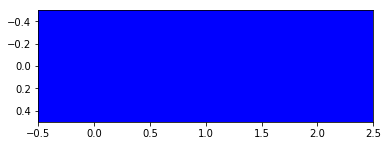

In [9]:
import cv2
import numpy as np

image = np.array([[[0,0,1.0],[0,0,1.0],[0,0,1.0]]])

im = getImage('data/kitti/training/image_2/000001.png')
plt.imshow(image)
plt.imsave('test',image)

In [10]:
cv2.imread("test.png")

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]], dtype=uint8)

In [8]:
import numpy as np
a=np.array([1,2,1,0,1])
b=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]])
ret = [b[a == i,:] for i in range(3)]

In [9]:
print(ret)

[array([[13, 14, 15, 16]]), array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12],
       [17, 18, 19, 20]]), array([[5, 6, 7, 8]])]
